Atlanta has the most damages. Having multiple entries in the top 10

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import wrangle as w
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler()

In [469]:
df1= w.acquire()
df1= w.prep(df1)

In [470]:
df= w.get_cws_data()

In [471]:
df.head(20)

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
0,3946,75.00,75.00,0,131,"Uncllctbl key, remote fees",136,"Uncllctbl key, remote fees",Current,1311,15,52500,False,666000,Accept,33,745,Insufficient period of Residence History,1
1,3962,13.66,13.66,0,112,Water 8/1/2021-9/1/2021,136,Utility-water charges,Current,1661,12,65000,False,889992,Accept with Conditions (Extra Deposit),27,758,No Credit Experience,0
2,4050,46.17,46.17,0,155,Damage charges - Clean,136,Damage charges,Current,1412,12,48000,False,576000,Accept with Conditions (Extra Deposit),33,666,Insufficient period of Residence History,1
3,4948,9.76,9.76,0,111,Sewer Charge,140,Utility-sewer charges,Current,1377,18,72000,False,0,A-Criminal History Meets Requirements,39,0,Meets All Property Requirements,0
4,5001,6.85,6.85,0,113,Sewer Base Charge,140,Utility-water flat base charges,Current,2199,13,0,True,54996,Accept with Conditions (Guarantor),23,752,NaN,0
5,5215,27.00,27.00,0,128,Trash service fee (05/2022),136,Trash service fee,Current,1569,12,0,False,85716,Accept,30,657,Meets All Property Requirements,0
6,5241,25.00,25.00,0,155,Damages- 1 load full of trash left out front t...,137,Damage charges,Current,1704,12,5528,False,66336,Accept,23,768,Meets All Property Requirements,1
7,5242,-4.25,-4.25,0,298,:Write Off Charge Ctrl#266779\r\nSewer Base Ch...,137,Uncllctbl Non Rent,Current,1676,15,3500,False,85200,Accept with Conditions (Extra Deposit),30,0,No Credit Experience,1
8,5246,-5.00,-5.00,0,192,:Write Off Charge Ctrl#28322\r\nAmenity fee (1...,140,Uncllctbl amenity fee,Current,1706,15,3600,False,98304,Accept,12,607,Insufficient period of Employment History,1
9,5250,-416.75,-416.75,0,105,:Write Off Charge Ctrl#1036499\r\nRent - pro r...,137,Uncllctbl rent,Current,1696,12,9895,False,168780,Accept,29,668,Insufficient period of Employment History,1


In [262]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', 'bad_resident')

In [263]:
def states(val):
    '''
    This funciton takes in a column of values and uses a previously established property key to 
    convert each property id into the name of the state in which the property resides
    '''
    if val in range(53,116) or val in range(152,159) or val in [198,218,229,252,440,441,442,458]:
        return 'Texas'
    elif val in range(116,124) or val in [159, 444]:
        return 'North Carolina'
    elif val in range(125,131) or val in [164,183,212,213,217, 253]:
        return 'Colorado'
    elif val in range(142,147) or val in [216]:
        return 'Arizona'
    elif val == 131:
        return 'California'
    elif val in range(132,142) or val in [385,443,459]:
        return 'Georgia'
    elif val in [277,280]:
        return 'Tennessee'
    elif val in range(147,152) or val in [160,161,162,163]:
        return 'Washington'

In [264]:
train.prop_id = train.prop_id.apply(states)

In [375]:
six_df.head()

,id,total_charges,amount_paid,open,charge_code,description,property_id,charge_name,status,rent,term,monthly_income,guarrantor_required,total_income,recommendation,age,risk_score,reason
119,3946,75.00,75.00,0,131,"Uncllctbl key, remote fees",136,"Uncllctbl key, remote fees",Current,1311,15,52500,False,666000,Accept,33,745,Insufficient period of Residence History
282,4050,46.17,46.17,0,155,Damage charges - Clean,136,Damage charges,Current,1412,12,48000,False,576000,Accept with Conditions (Extra Deposit),33,666,Insufficient period of Residence History
691,5241,25.00,25.00,0,155,Damages- 1 load full of trash left out front t...,137,Damage charges,Current,1704,12,5528,False,66336,Accept,23,768,Meets All Property Requirements
713,5242,-4.25,-4.25,0,298,:Write Off Charge Ctrl#266779\r\nSewer Base Ch...,137,Uncllctbl Non Rent,Current,1676,15,3500,False,85200,Accept with Conditions (Extra Deposit),30,0,No Credit Experience
717,5242,-25.00,-25.00,0,298,:Write Off Charge Ctrl#48446\r\nUtility-trash ...,137,Uncllctbl Non Rent,Current,1676,15,3500,False,85200,Accept with Conditions (Extra Deposit),30,0,No Credit Experience


In [465]:
def get_common(df1):
    
    '''
    This functions filters out the negative charge codes, then gets the top six of those codes.
    It then returns a plot to show the results. 
    '''
    
    # negative charge codes
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    
    # top six negative charge codes
    six= [298, 155, 105, 154, 156, 131]
    
    order= [298, 105, 155, 154, 156, 131]
    
    # create new df using negative charge codes
    bad_df= df1[df1['charge_code'].isin(cc)]
    
    # create new df using the top six negative charge codes
    six_df= bad_df[bad_df['charge_code'].isin(six)]
    
    #plotting the results of the function
    color= ['red', 'grey', 'grey', 'grey', 'grey', 'grey',]
    ax = sns.countplot(
                     data= six_df , x= 'charge_code', palette = color,
                     order= order, edgecolor = 'black', linewidth= 3.8)
    
    # Set xlabel
    plt.xlabel('Total Count')
    
    # Set ylabel
    plt.ylabel('Charge Code')
    
    # Set plot title
    plt.title('Total Charge Code Count')
    
    # set font scale
    sns.set(font_scale= 4.5)

In [ ]:
    six= [298, 105, 155, 154, 156, 131]
    
    # create new df using negative charge codes
    bad_df= train[train['charge_code'].isin(cc)]
    
    # create new df using the top six negative charge codes
    six_df= bad_df[bad_df['charge_code'].isin(six)]
    
    #plotting the results of the function
    color= ['grey', 'grey', 'grey', 'grey', 'grey','red']
    bar = sns.countplot(data= six_df , x= 'charge_code', color = 'grey', ec= 'black')
    patch_h = [patch.get_height() for patch in bar.patches]   
    idx_tallest = np.argmax(patch_h)   
    bar.patches[idx_tallest].set_facecolor('seagreen')
    plt.title('Most Common Charge Codes')
    plt.xlabel('Charge')
    plt.ylabel('Count')
    for i in bar.containers:
            bar.bar_label(i,)
            
    return plt.show()   

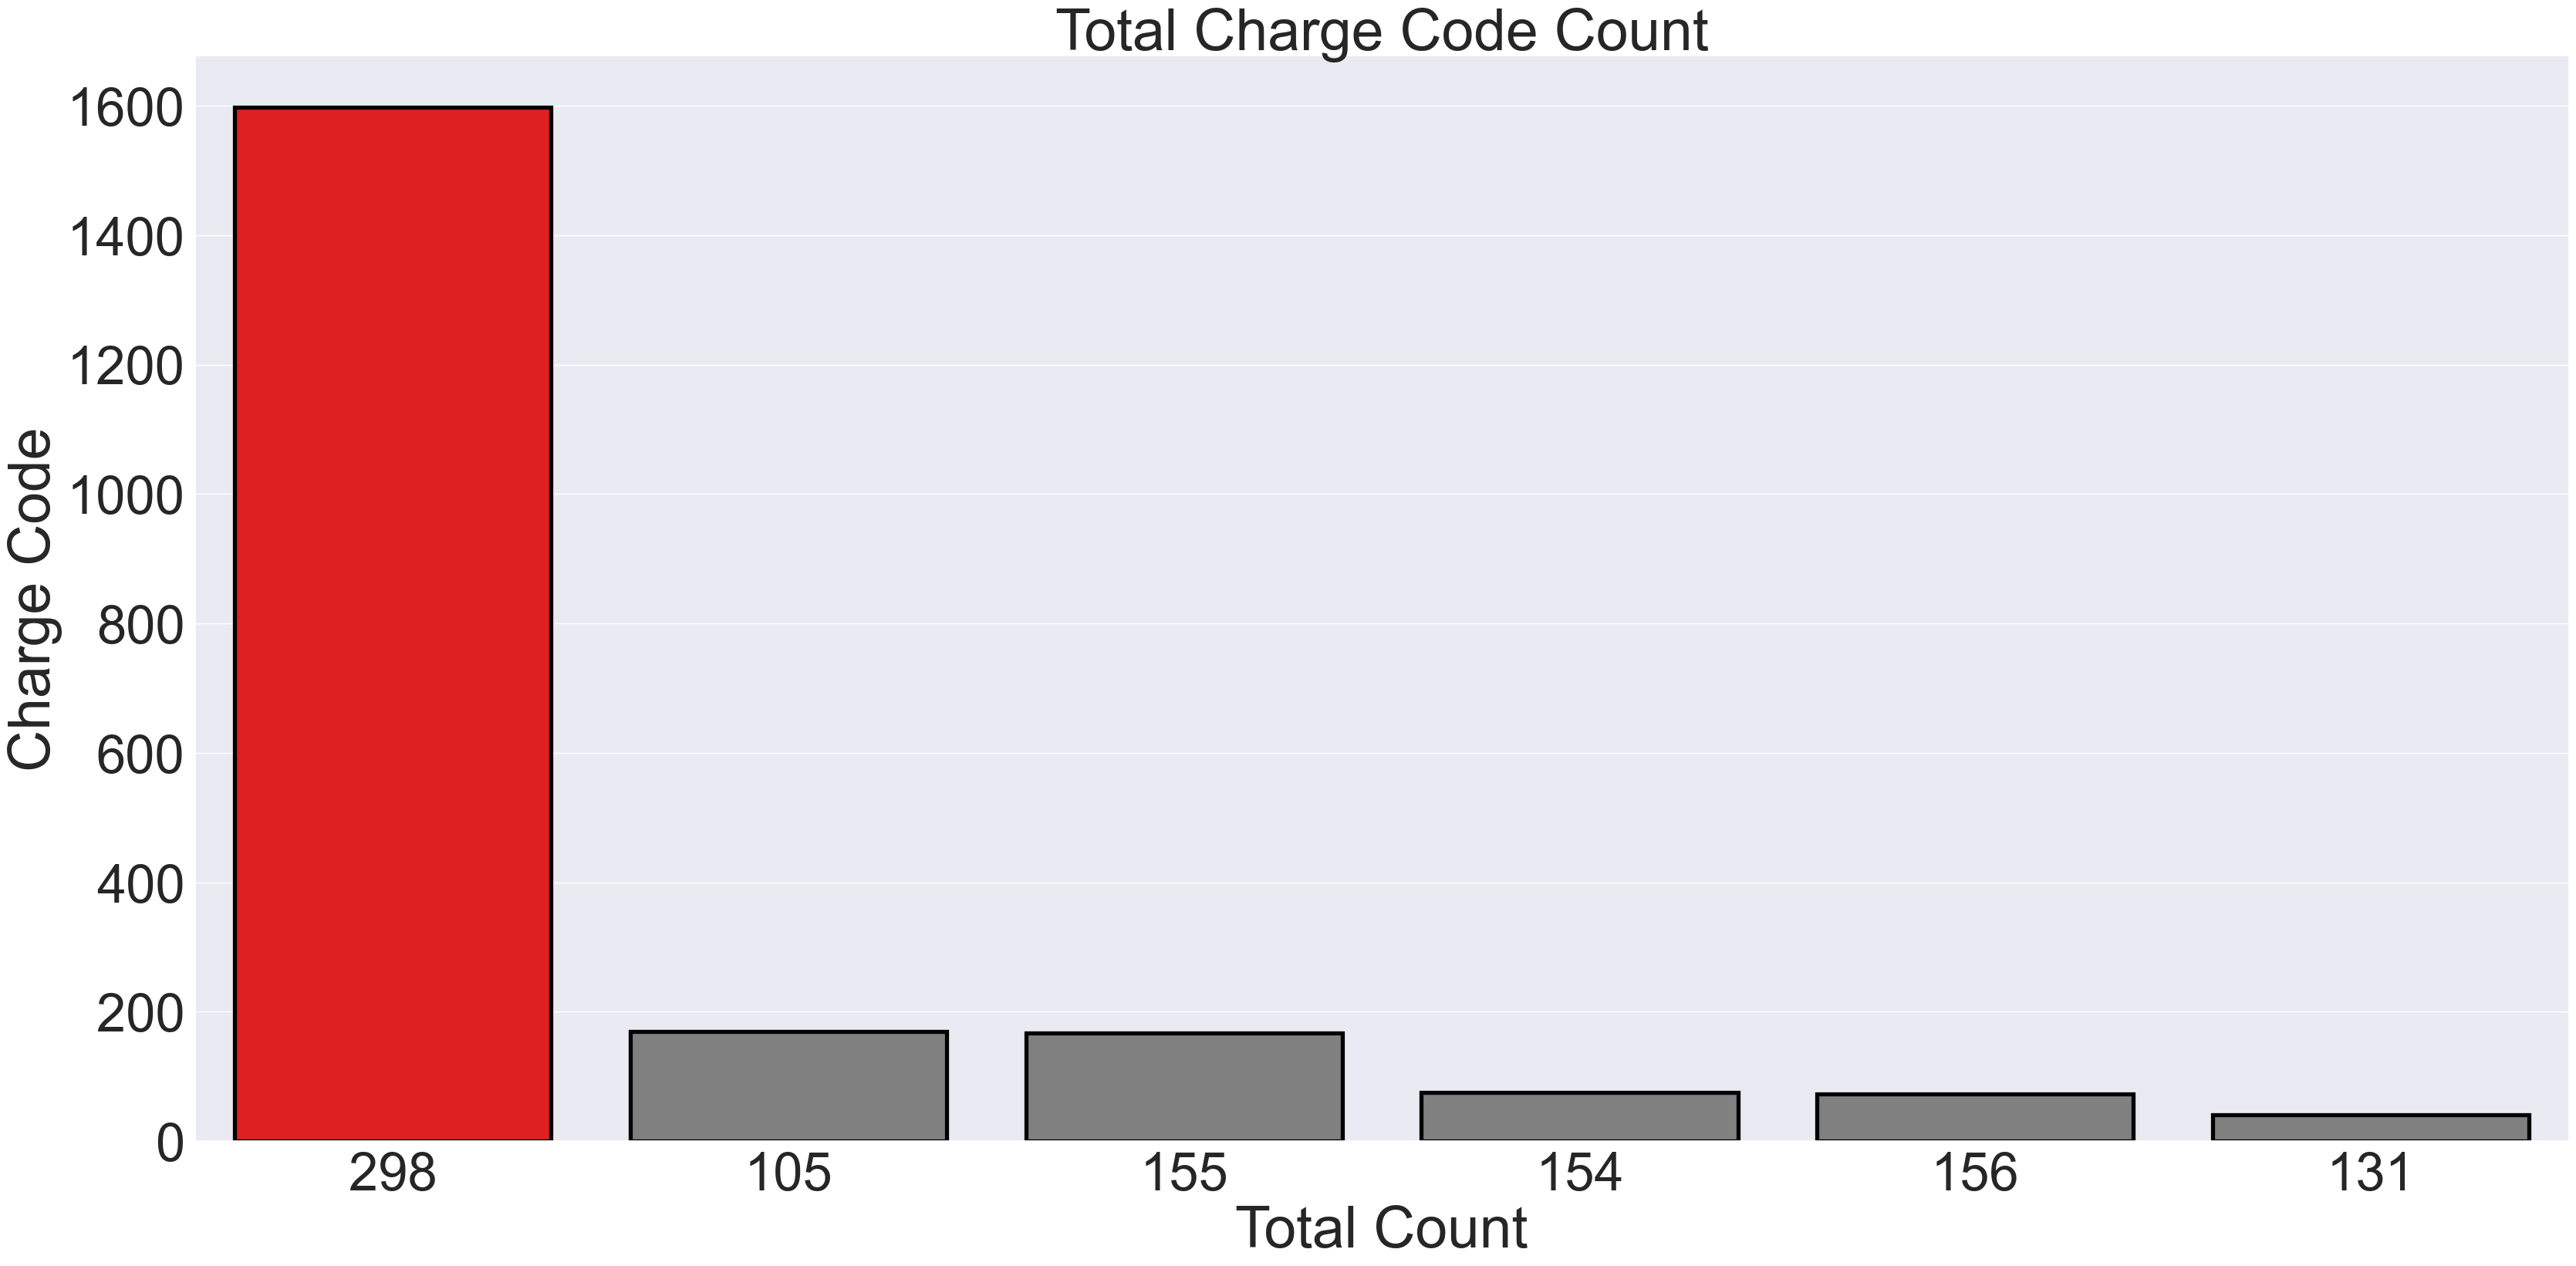

In [466]:
get_common(df1)

Takeaways:

Here we can see that Charge Code `298` is the most common, by a huge margine. 

In [274]:
def bad_properties(train):
    
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    six= [298, 105, 155, 154, 156, 131]
    
    bad_properties= train[train['charge_code'].isin(cc)]
    df3= bad_properties.groupby('prop_id')['charge_code'].count().nlargest(10)
    df3= pd.DataFrame({'most_common': df3})
    df3= df3.reset_index()
    return df3

In [276]:
df3= bad_properties(train)

In [467]:
def plot_bad_properties(df3):
    color= ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
    fig = plt.figure()
    ax= sns.barplot(data= df3, x= 'prop_id', y= 'most_common', palette= color, ec= 'black' , linewidth= 3.8)
    sns.set(rc={'figure.figsize':(39.7,18.27)})
    sns.set(font_scale= 4.5)
    plt.xlabel('Property ID')
    plt.ylabel('Charge Code Count')
    plt.title('Properties With The Most Damage Codes')
    for i in ax.containers:
            ax.bar_label(i,)

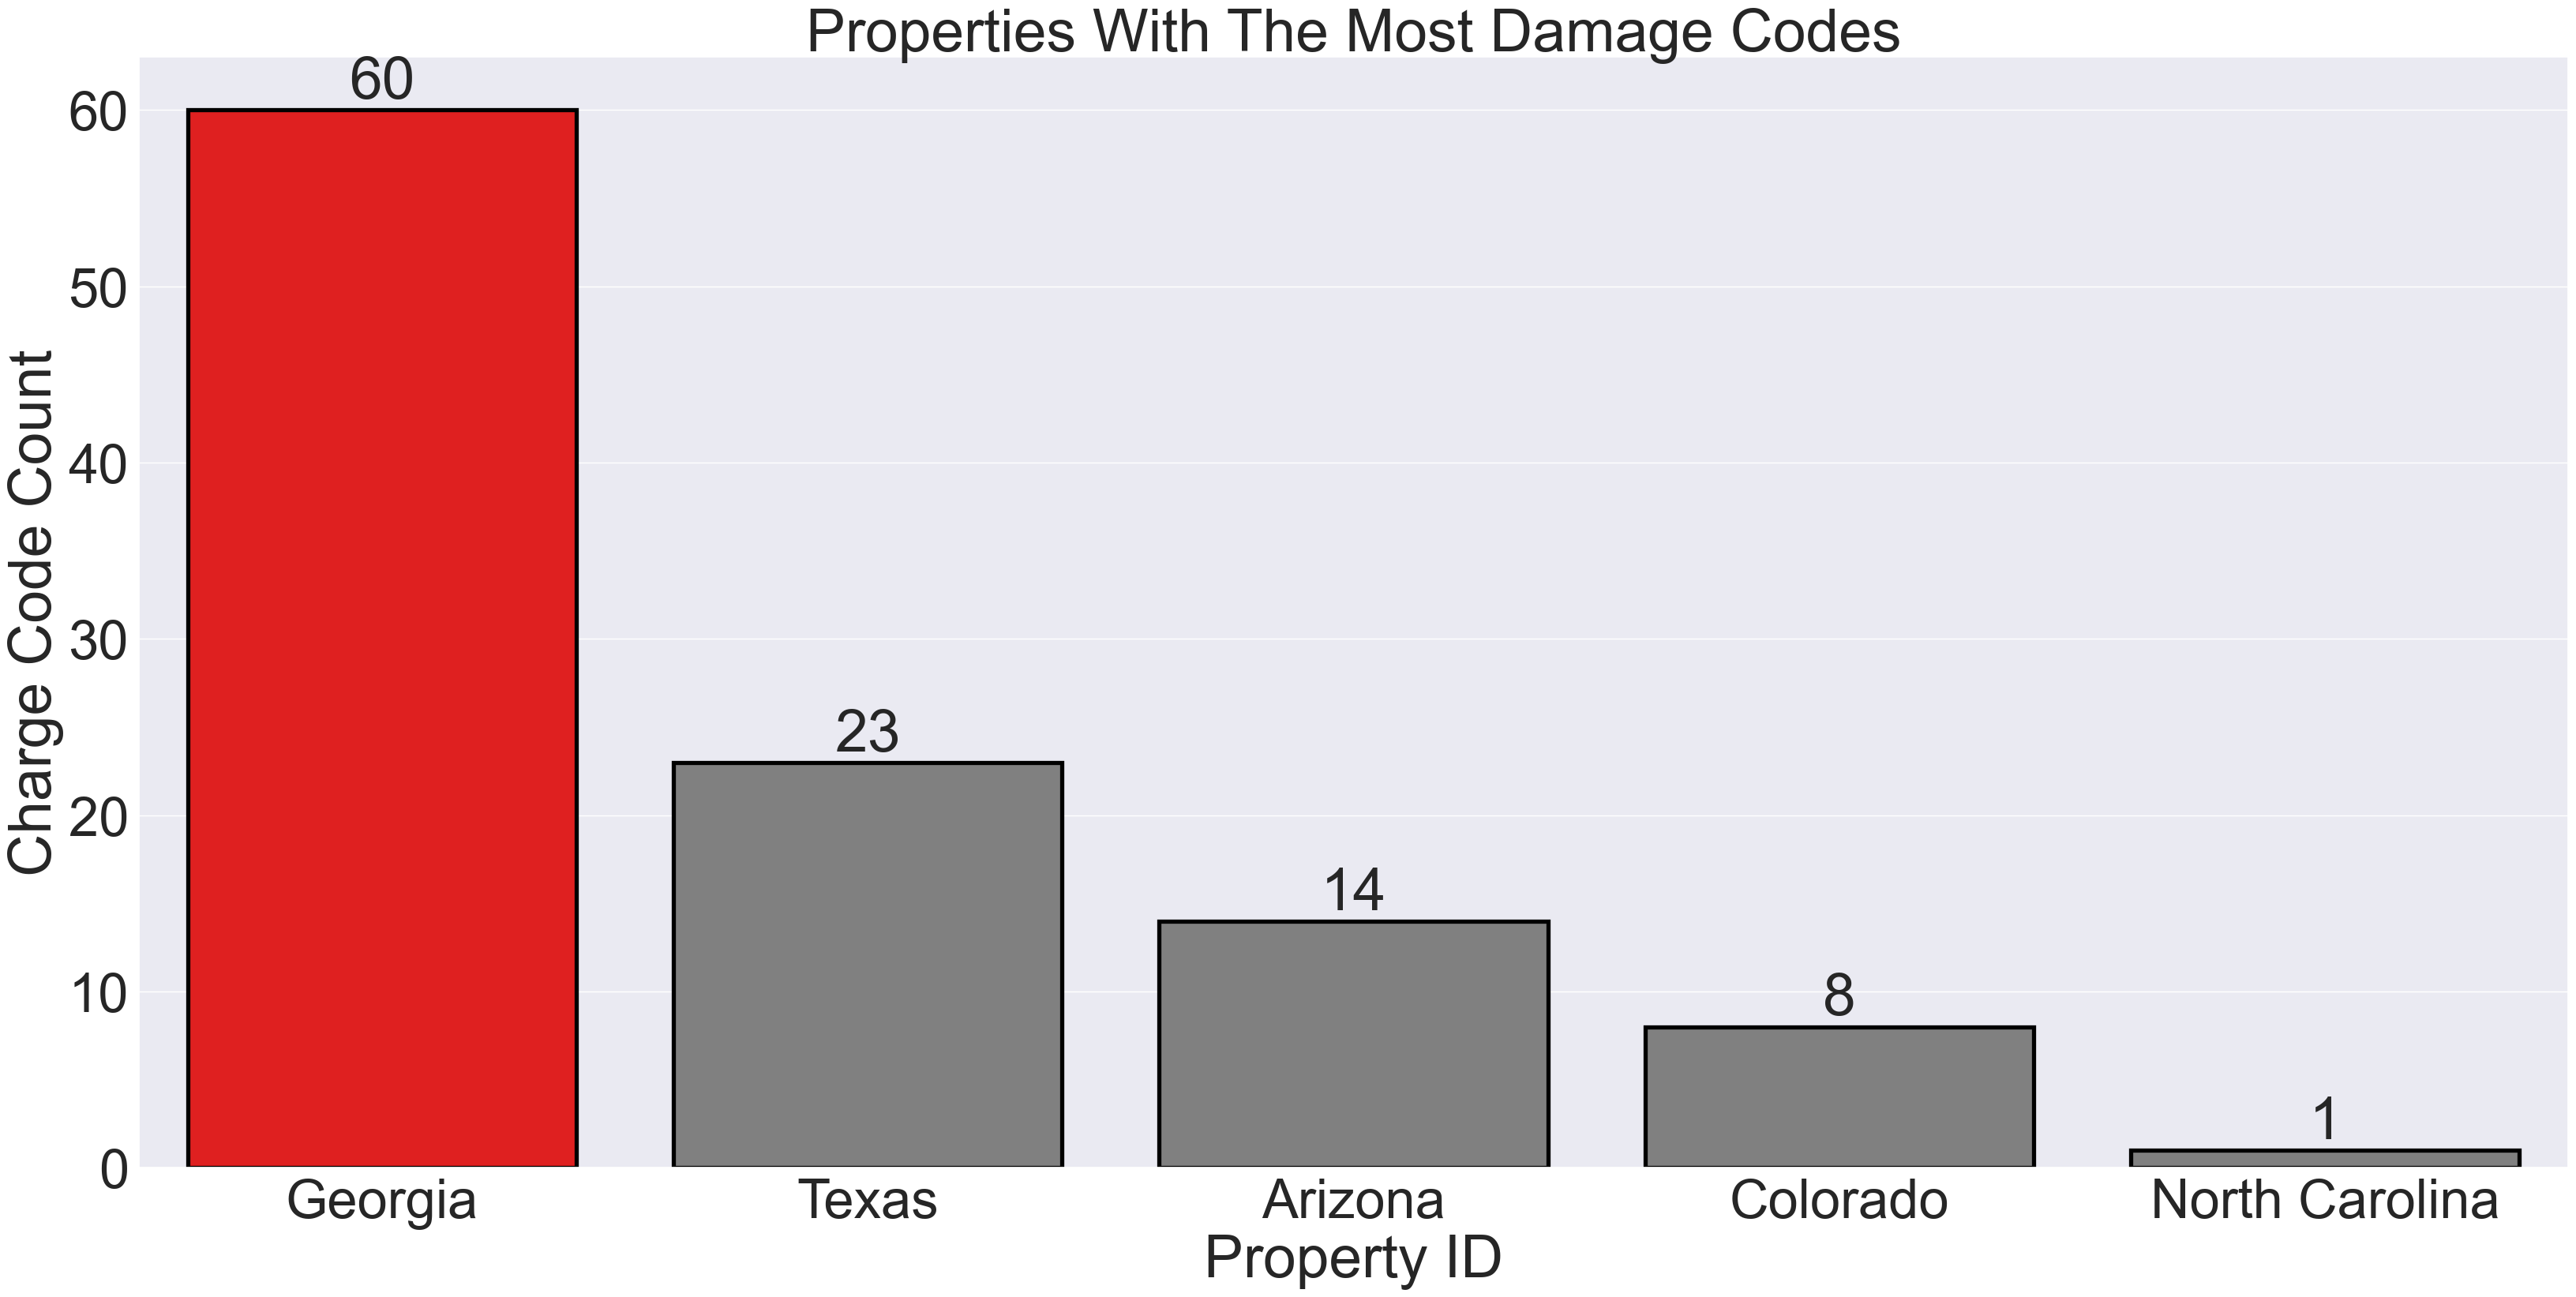

In [468]:
plot_bad_properties(df3)

In [15]:
bad_df= df1[df1['charge_code'].isin(cc)]

In [17]:
six= [298, 105, 155, 154, 156, 131]

In [18]:
six_df= bad_df[bad_df['charge_code'].isin(six)]

In [124]:
bad_df2= train[train['charge_code'].isin(cc)]

In [167]:
bad_df.groupby('property_id')['charge_code'].count().nlargest(10)

property_id
136    736
137    629
216    215
140    105
67      51
73      50
135     48
70      36
142     25
57      24
Name: charge_code, dtype: int64

In [132]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
bad_prop_df= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [163]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
prop_group= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [165]:
prop_group.bad_resident.mean()

1.0

In [497]:
color= ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'red']
def countplot(data, column, palette, bad = False):
    sns.set(rc={'figure.figsize':(10,5)})
    
    if bad: 
        bad_resid = data[(data.bad_resident == 1)]
        sns.countplot(x = column, data = bad_resid, palette= color, ec = 'black')
        plt.title(f'NUMBER OF RESIDENTS BY {column.upper()}')
        plt.xlabel(f'{column.capitalize()}')
        plt.ylabel('Count')
        plt.show()
    
    else:
        
        sns.countplot(x = column, data = data, palette= color, ec = 'black')
        plt.title(f'NUMBER OF RESIDENTS BY {column.upper()}')
        plt.xlabel(f'{column.capitalize()}')
        plt.ylabel('Count')
        plt.show()

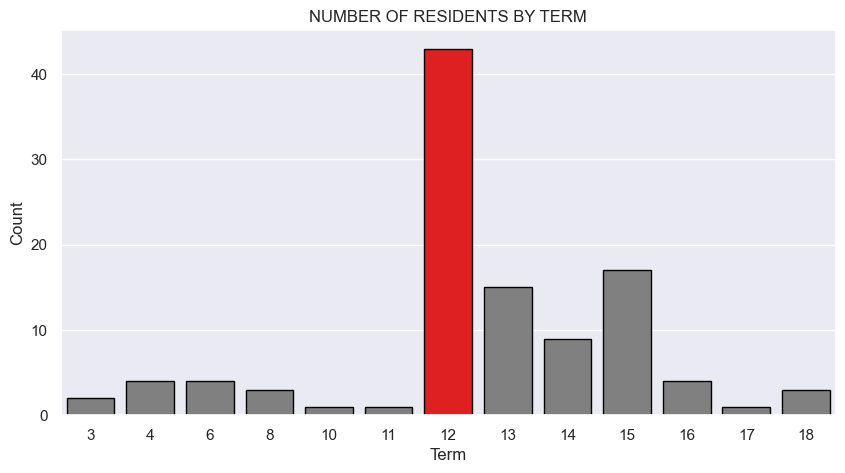

In [498]:
countplot(train, 'term', color, bad= True)

In [501]:
def viz_rent(train, col):
    '''plot histogram'''
    
    bins = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500, 2600]
    
    plt.figure(figsize=(8, 16))
    
    plt.subplot(211)
    rent_bin = pd.cut(train[col], bins = bins)
    sns.countplot(y=rent_bin,hue='bad_resident',data=train)
    sns.despine()
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.title('Relation of rent with Resident')
    plt.xlabel('Count')
    plt.xlim(0, 55)
    plt.ylabel(col.capitalize())
    plt.legend(labels= ['Good Resident','Bad resident'])
    
    plt.subplot(212)
    train_bad_resident = train[train['bad_resident']==1]
    rent_bin_bad = pd.cut(train_bad_resident['rent'], bins = bins)
    sns.countplot(y=rent_bin_bad,data=train_bad_resident, color = 'seagreen')
    sns.despine()
    plt.title('Relation of rent with Bad Resident')
    plt.xlabel('Count')
    plt.ylabel(col.capitalize())
    

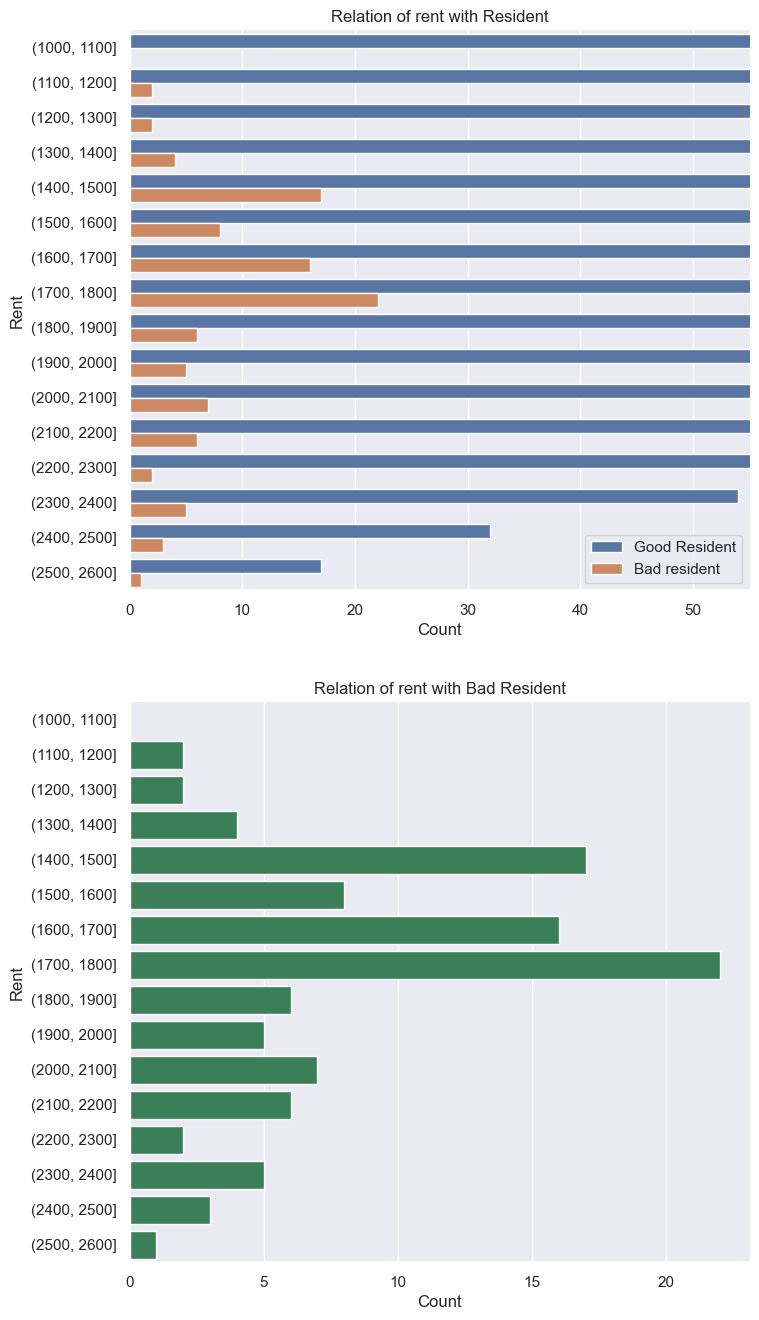

In [502]:
viz_rent(train, 'rent')

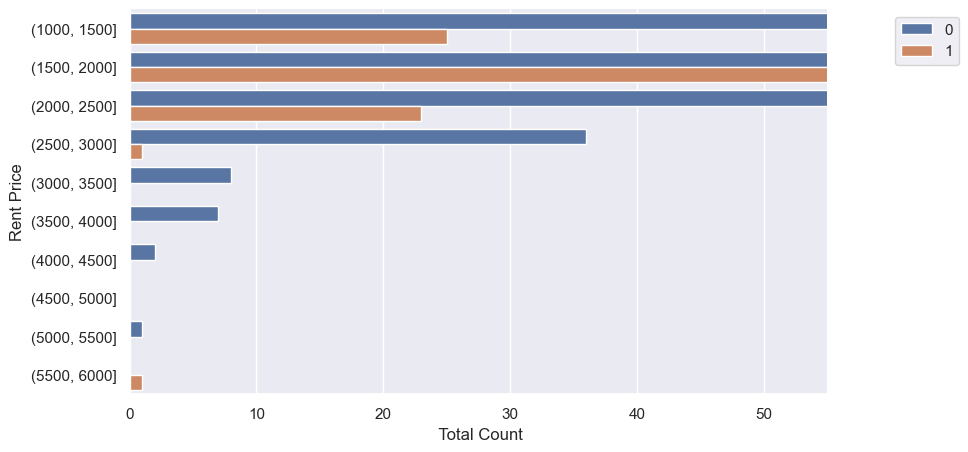

In [507]:
bins = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000] 
colors= ['']
rent_bin = pd.cut(train['rent'], bins = bins)
plt.figure(figsize=(9, 5))
sns.countplot(y=rent_bin,hue= 'bad_resident', data=train)
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel(' Total Count')
plt.ylabel('Rent Price')
plt.xlim(0,55)
plt.show()